In [0]:
#description: this program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#             to predict closing stock price of Apple using past 60 day price data

In [1]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

Using TensorFlow backend.


In [2]:
#get the stock quote 
df = web.DataReader("AAPL", data_source="yahoo", start="2012-01-01", end="2019-12-17")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,270.128906
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.817261
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,274.498535


In [3]:
#get number of rows and columns 
df.shape

(2003, 6)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


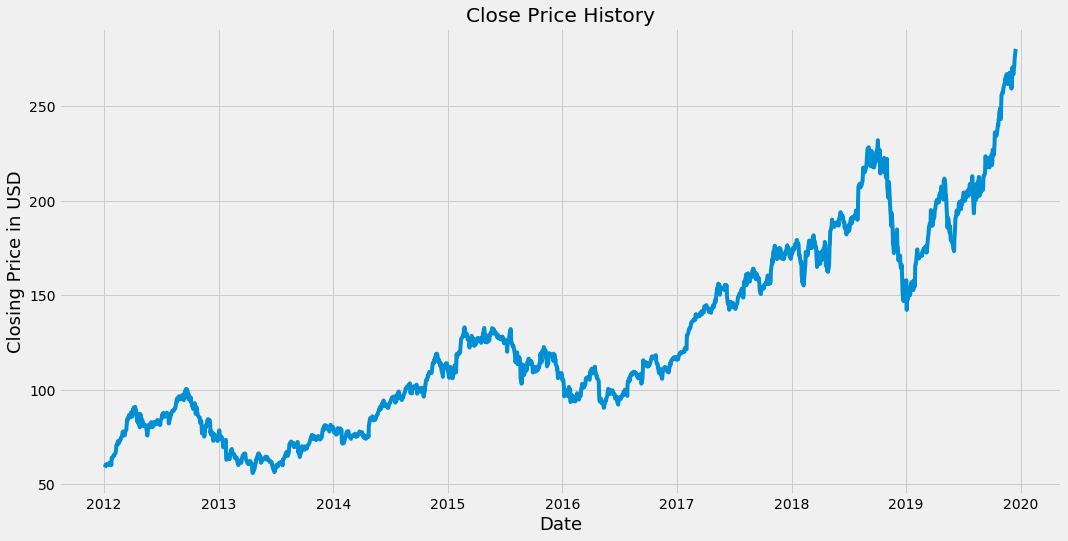

In [4]:
#visualize the closing price data
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price in USD", fontsize=18)
plt.show()

In [5]:
#create a new data frame with only closed column
data = df.filter(["Close"])
#convert dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on (80%)
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1603

In [6]:
#scale the data, preprocessing input data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [7]:
#create the training data set 
#create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(X_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [0]:
#convert to X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
#reshape train data 
X_train.shape


(1543, 60)

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1543, 60, 1)

In [11]:
#build LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [13]:
#train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1543/1543 [==============================] - 129s 84ms/step - loss: 6.5982e-04


In [0]:
#create testing data set
#create new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])


In [0]:
#convert the data to a numpy array 
X_test = np.array(X_test)

In [0]:
#reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
#get the models predicted price values 
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


In [18]:
#get the root mean squared error (RMSE) - low = better fit
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

0.24183494567871094

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


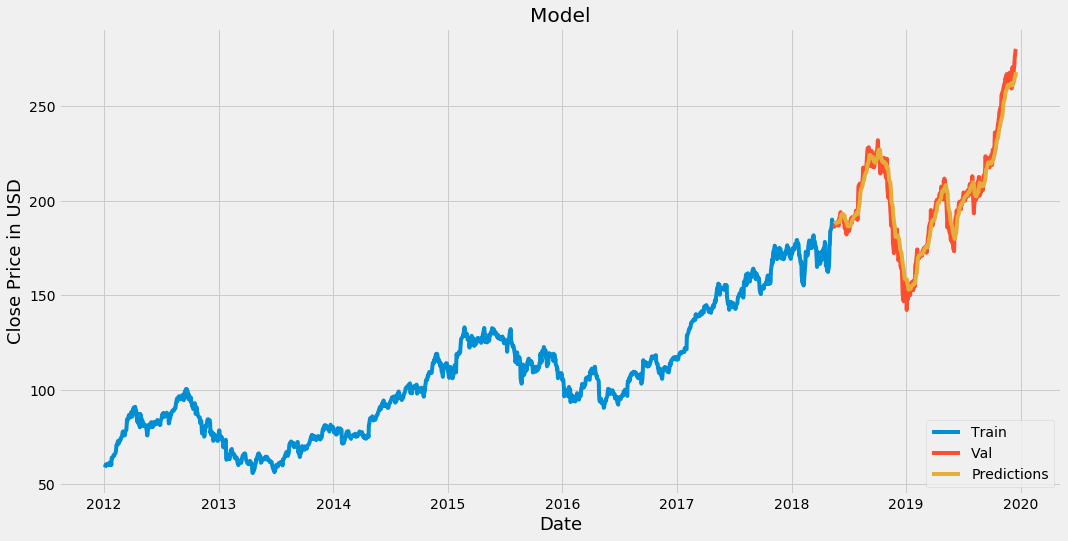

In [21]:
#plot data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
#visualize 
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price in USD", fontsize =18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()


In [22]:
#show the valid/actual price and predicted prices
valid 

,Close,Predictions
Date,,
2018-05-17,186.990005,187.799072
2018-05-18,186.309998,187.985336
2018-05-21,187.630005,187.954590
2018-05-22,187.160004,188.019424
2018-05-23,188.360001,188.060410
...,...,...
2019-12-11,270.769989,263.231598
2019-12-12,271.459991,264.108795
2019-12-13,275.149994,265.021332


In [24]:
#predict closing price of apple stock for dec 18 
apple_quote = web.DataReader("AAPL", data_source="yahoo", start="2012-01-01", end= "2019-12-17")
#create a new dataframe
new_df = apple_quote.filter(["Close"])
#get the last 60 day closing price values and covnert the datafram to array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create empty list
x_test = []
#append the past 60 days 
x_test.append(last_60_days_scaled)
#convert the x_test data set to numpy array
x_test = np.array(x_test)
#reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], X_test.shape[1], 1))
#get predicted scaled price
pred_price = model.predict(x_test)
#undo scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[269.97873]]


In [25]:
#get actual price
apple_quote2 = web.DataReader("AAPL", data_source="yahoo", start="2019-12-18", end= "2019-12-18")
print(apple_quote2["Close"])

Date
2019-12-18    279.73999
Name: Close, dtype: float64
